In [1]:
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft2, fft2, fftshift
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from matplotlib import cm
from matplotlib.ticker import LinearLocator


%matplotlib inline

def opt_plot():
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
def NDFT(M, xn):
    
    N = len(xn)
            
    ndft = np.zeros((M, N), complex)
        
    for m in np.arange(M):
        for n in range(N):
            ndft[m, n] = (1./N)*np.exp(-2j*np.pi*m*xn[n])
    
    return ndft

def S2D(x,y):
    
    #s = 0.5*(np.sin(2*np.pi*((3*x+2*y) + (2*x+2*y) )+ np.sin(2*np.pi*(x+y))))
    #s = np.cos(2*np.pi*((3*x+ 2*y) + (2*x + 3*y)))  + np.sin(4*np.pi*(x + y))
    s = 0.5*(np.cos(2*np.pi*(3*x + 2*y))  + np.cos(2*np.pi*(2*x + 3*y)) + np.sin(4*np.pi*(x + y)))
    
    return s

In [3]:
Nx = 128
Ny = 64

tfx = 128
tfy = 64

x = np.linspace(0, tfx, Nx)
y = np.linspace(0, tfy, Ny)
Kx = np.linspace(-(np.pi)/(tfx/Nx),(np.pi)/(tfx/Nx),Nx)
Ky = np.linspace(-(np.pi)/(tfy/Ny),(np.pi)/(tfy/Ny),Ny)

Zam = np.ones((Nx,Ny), int)

X,Y = np.meshgrid(x,y)
Z = S2D(X,Y)

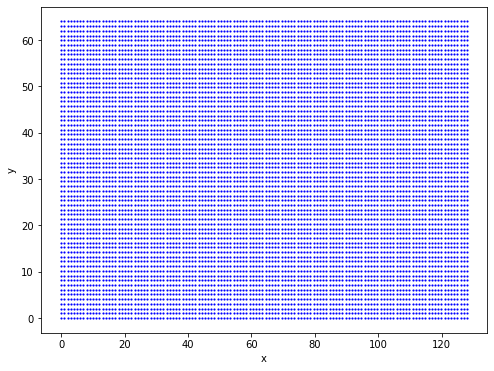

In [34]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(X,Y, color='blue', s=1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Graderegular.jpg')
plt.show()

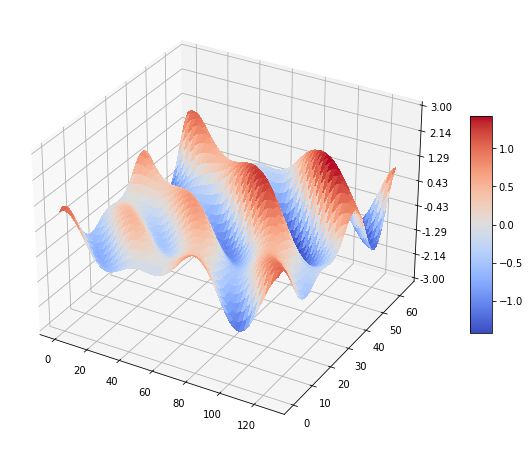

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 3)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('sianalharmonicooriginal.jpg')
plt.show()

In [6]:
FK = abs(np.fft.fftshift(np.fft.fft2(Z,norm='forward')))

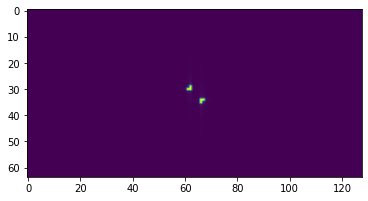

In [7]:
plt.imshow(FK)

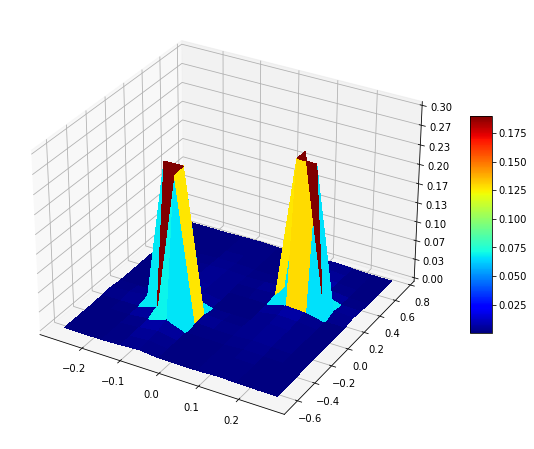

In [8]:
kx, ky = np.meshgrid(Kx[58:70],Ky[25:40])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(kx, ky, FK[25:40,58:70], cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0., 0.3)

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Espectro2Doriginal.jpg')
plt.show()

In [9]:
xdec = np.zeros(Nx)
ydec = np.zeros(Ny)
    
ix = random.sample(range(len(x)), 56)
iy = random.sample(range(len(y)), 35)
  
for i in ix:
    xdec[i] = x[i]
for i in iy:
    ydec[i] = y[i]

xdec = np.sort(np.array(xdec))
ydec = np.sort(np.array(ydec))

In [10]:
Xdec,Ydec = np.meshgrid(xdec,ydec)
Zdec = S2D(Xdec, Ydec)

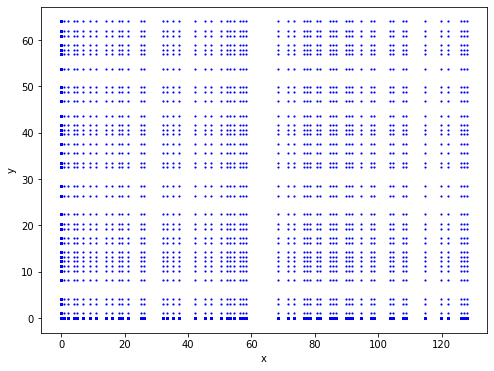

In [33]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(Xdec,Ydec, color='blue', s=1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Gradeirregular.jpg')
plt.show()

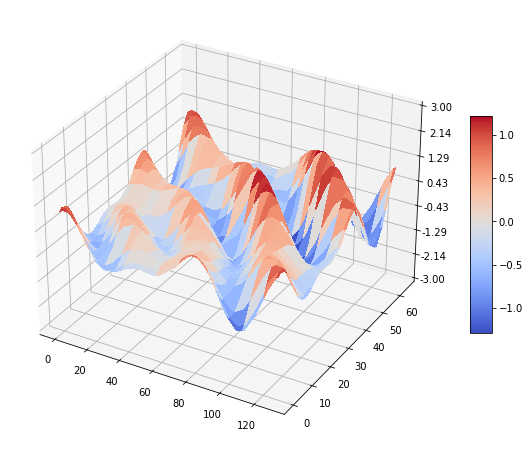

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(Xdec, Ydec, Zdec, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 3)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Sinal2Ddecimadocap1.jpg')
plt.show()

In [13]:
Fx = NDFT(Nx, xdec/tfx)
Fy = NDFT(Ny, ydec/tfy)

In [14]:
print(Fx.shape)
print(Fy.shape)

(128, 128)
(64, 64)


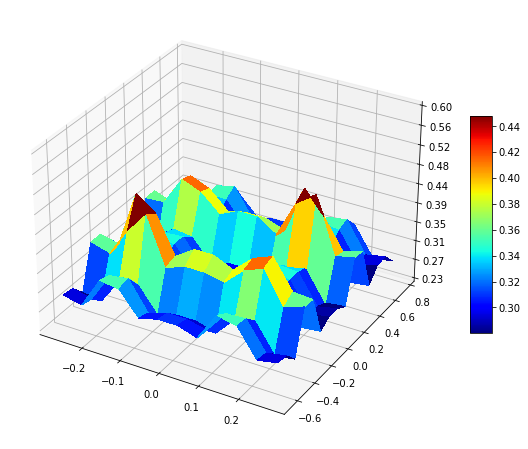

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(kx, ky,abs(np.fft.fftshift(np.dot(np.dot(Fy, Zdec), Fx.T)))[25:40,58:70], cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.23, 0.6)

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Espectro2Ddecimado.jpg')
plt.show()

In [16]:
def MPFI(Fy, Fx, y , epsilon):

    r = y
    num_ite = 0
    #indices = np.array([])
    x = np.zeros((Fy.shape[0],Fx.shape[0]), complex)


    while (np.linalg.norm(r , ord=2) >= epsilon):
        
        print(np.linalg.norm(r , ord=2))
        
        absolute_fourier_domain = abs(np.dot(np.dot(Fy, r), Fx.T)) # Indo para o espaço da transformada

        max_freq_fourier_domain = np.max(absolute_fourier_domain) # Pegando a frequência com maior valor absoluto

        indicey = np.where( absolute_fourier_domain == max_freq_fourier_domain )[0][0]
        #print(indicey)
        indicex = np.where( absolute_fourier_domain == max_freq_fourier_domain )[1][0]
        #print(indicex)

        atoms_selected_x = Fx[indicex,:]
        atoms_selected_x = np.reshape(atoms_selected_x, (1, y.shape[1]))
        atoms_selected_y = Fy[indicey,:]
        atoms_selected_y = np.reshape(atoms_selected_y, (1, y.shape[0]))

        coef_max_value = np.dot(np.dot(atoms_selected_y, r), atoms_selected_x.T)
        #coef_max_value.reshape((1,1))

        x[indicey, indicex] = x[indicey, indicex] + coef_max_value # Guardando as frequências
        r = r - (y.shape[0]*y.shape[1])*np.dot(np.dot(np.conjugate(atoms_selected_y).T, coef_max_value), np.conjugate(atoms_selected_x))

        num_ite+=1
    
    return x, num_ite

In [17]:
tol = 0.001
new_espec, num_ite = MPFI(Fy,Fx, Zdec, tol)

63.902320968732454
45.348614355589454
31.39573110914519
27.22139728746027
27.530516741714756
19.069024892221677
18.878568185668687
11.56251900740003
11.208848627948115
9.221794303998278
7.504020137171551
7.092541586103406
6.824174257522891
5.878913459560348
5.216371372415961
4.323568541767708
3.0437703332788475
2.8529871158608184
2.5111959809465794
2.393614580874767
1.8585291755339721
1.7062228670863164
1.6044892583909716
1.3231399430753261
0.9718442192998435
0.9376407070160399
0.7881293779394062
0.6937992341532995
0.6763745637429814
0.59019507679341
0.41076143945077437
0.4065639877710135
0.35226512691023754
0.3060602624267946
0.2866195302592257
0.18186314046077698
0.19218599386331886
0.16660886153425009
0.1633609204484767
0.13722651752893647
0.12002311949485127
0.09883619645550744
0.08411919005908851
0.07990385884266406
0.06904222349245161
0.055494944788020674
0.04463181025742893
0.03507765062955153
0.036289620903839796
0.03488204430826644
0.03145398552227178
0.02704715741915144
0.020

In [18]:
print(num_ite)

77


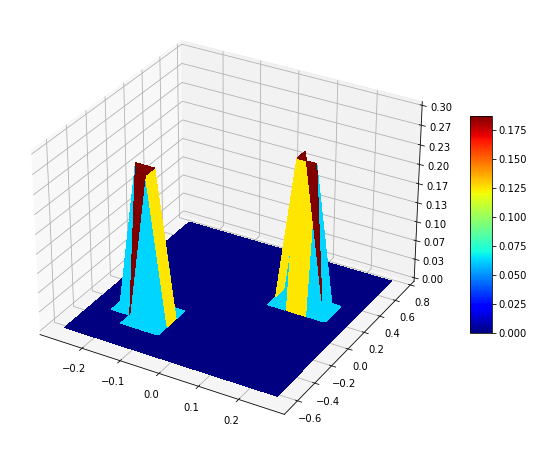

In [28]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(kx, ky, abs(np.fft.fftshift(new_espec))[25:40,58:70], cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0., 0.3)

ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Espectro2Dreconstruido.jpg')
plt.show()

In [20]:
Fxi = NDFT(Nx, x/tfx)
Fyi = NDFT(Ny, y/tfy)

In [21]:
sinal_rec = (Nx*Ny)*np.dot(np.dot(np.conjugate(Fyi.T),new_espec),np.conjugate(Fxi)).real

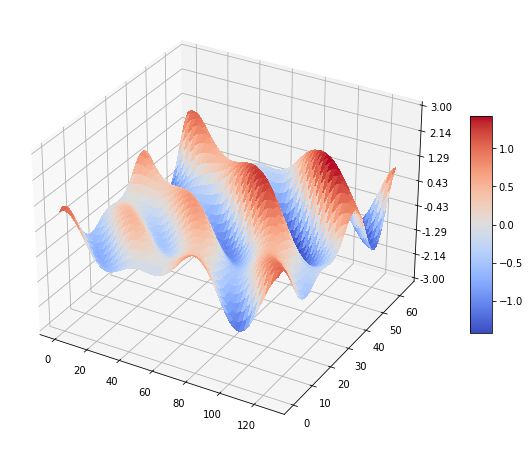

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(X, Y, sinal_rec, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-3, 3)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Sinal2Dreconscap1.jpg')
plt.show()

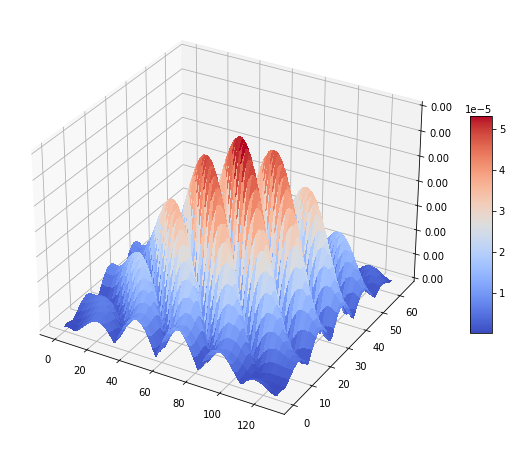

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
# Plot the surface.
surf = ax.plot_surface(X, Y, abs(Z - sinal_rec), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 6*10**-5)

ax.zaxis.set_major_locator(LinearLocator(8))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig('Diferençaabsoluta.jpg')
plt.show()

In [24]:
def RMS(sismograma, sismograma_interpolado):
    rsme = np.linalg.norm(sismograma[:,:] - sismograma_interpolado[:,:], ord=2)/np.linalg.norm(sismograma[:,:], ord=2)
    return rsme

def SNR(sismograma, sismograma_interpolado):
    snr = 10*np.log10(np.linalg.norm(sismograma[:,:], ord=2)/np.linalg.norm((sismograma[:,:] - sismograma_interpolado[:,:]), ord=2))
    return snr

In [25]:
print(RMS(Z, sinal_rec)*100)
print(SNR(Z, sinal_rec))

0.0034383680171126275
44.636476415385616
